# Objective

Find a better way to found squares on card's corners

In [239]:
import os

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [240]:
TESTS_INPUT_FOLDER = 'tests/'

IMG_SIZE = (1017, 1401)

In [241]:
# Load all tests

tests = []
for file in os.listdir(TESTS_INPUT_FOLDER):
    img = cv.imread(TESTS_INPUT_FOLDER + file)
    img = cv.resize(img, IMG_SIZE)
    tests.append(img)

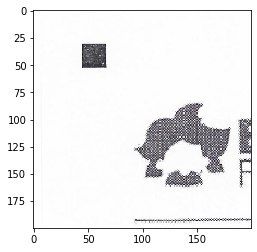

In [242]:
# Looking deep into my enemy
plt.imshow(cv.cvtColor(tests[0][:200, :200], cv.COLOR_BGR2RGB))

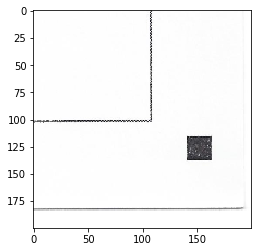

In [243]:
plt.imshow(cv.cvtColor(tests[0][-200:, -200:], cv.COLOR_BGR2RGB))

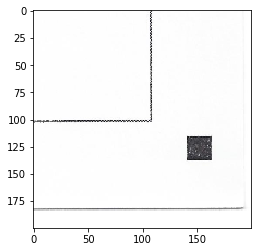

In [244]:
plt.imshow(cv.cvtColor(tests[0][IMG_SIZE[1]-200:, IMG_SIZE[0]-200:], cv.COLOR_BGR2RGB))

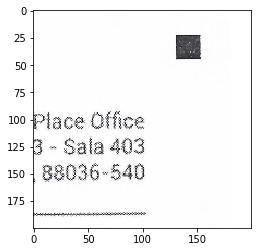

In [245]:
plt.imshow(cv.cvtColor(tests[0][:200, IMG_SIZE[0]-200:], cv.COLOR_BGR2RGB))

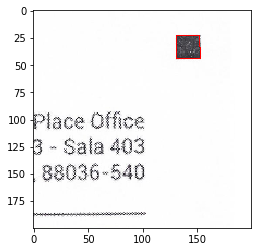

In [246]:
img = tests[0][:200, IMG_SIZE[0]-200:].copy()

mask = cv.inRange(img, np.array([0, 0, 0]), np.array([120, 120, 120]))
contours, _ = cv.findContours(mask, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

cnts = []
for cnt in contours:
        cnt_len = cv.arcLength(cnt, True)
        cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
        if len(cnt) == 4 and cv.isContourConvex(cnt) and cv.contourArea(cnt) > 100:
            cnts.append(cnt)

cv.drawContours(img, cnts, -1, [0, 0, 255])

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))